In [3]:
import numpy as np
import matplotlib.pyplot as plt

Consider a stock price with the following dynamics:
$$dS(t) = \mu S(t) dt + \sigma S(t) dW(t)$$

Suppose we apply the log transformation 
$$X(t) = log(S(t))$$

By Ito's Lemma, we have:
$$
\begin{aligned}
dX(t) &= \frac{\partial X}{\partial t} dt + \frac{\partial X}{\partial S} dS + \frac{1}{2} \frac{\partial^2 X}{\partial S^2} (dS)^2 \\
 &= \frac{1}{S}dS + \frac{1}{2} \frac{-1}{S^2} (dS)^2 \\
 &= (\mu - \frac{1}{2} \sigma^2)dt+ \sigma dW(t)
\end{aligned}
$$

An Euler Discretization is given by,
$$ X(t+ \Delta t) = X(t) + (\mu - \frac{1}{2} \sigma^2) \Delta t + \sigma (W(t+ \Delta t) - W(t)) $$

Instead of looping over time, and price, construct a matrix where nrow = number of paths, and ncol = number of time steps such that each row is one path of the stochastic process

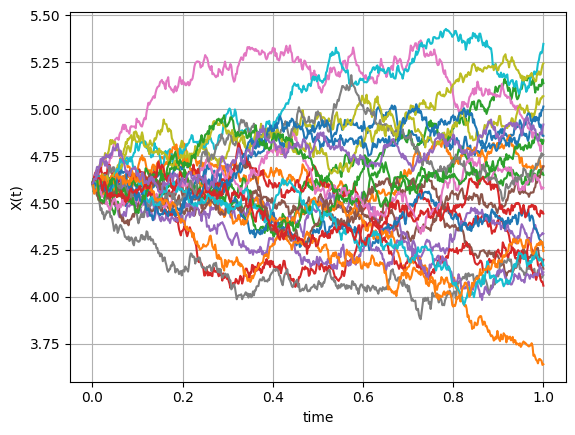

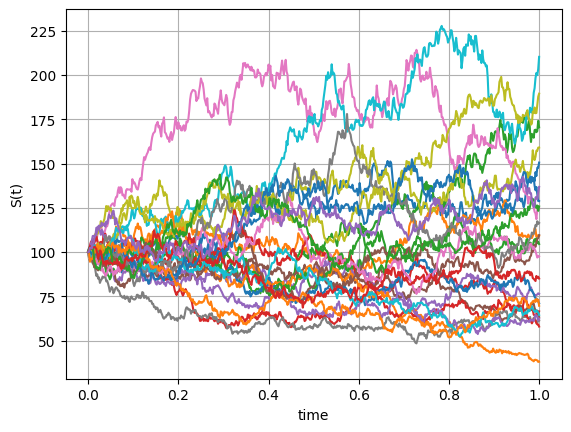

In [5]:
def GeneratePathsGBM(NoOfPaths,NoOfSteps,T,mu,sigma,S_0):    
    
    # Fixing random seed
    np.random.seed(1)
    
    # Simulate random numbers
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    # Apply log transform to first column of the matrix to get X_0
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        # Standardize results because samples are not always normal. This helps achieve convergence.
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        
        # Next column = previous column + Euler discretization
        X[:,i+1] = X[:,i] + (mu - 0.5 * sigma **2 ) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt
        
    #Compute exponent of GBM
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500
    T = 1
    mu = 0.05
    sigma = 0.4
    S_0 = 100
    
    Paths = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,mu,sigma,S_0)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
mainCalculation()